# Working with Images in Python

## Pengantar

**Apakah itu Image?**

Gambar pada dasarnya adalah matriks nilai piksel. Setiap piksel mewakili warna, dan intensitas warna tersebut ditentukan oleh nilainya. Umumnya, gambar direpresentasikan dalam 3 channel warna: Merah, Hijau, dan Biru (RGB). Bayangkan saja seperti "microsoft excel" yang memiliki baris dan kolom, gambar juga memiliki baris dan kolom, namun dalam kasus ini, setiap sel memiliki nilai yang mewakili warna.

## Mengimport Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # opencv
import os

**Penjelasan:**
- `numpy` adalah library yang digunakan untuk operasi matriks
- `matplotlib` adalah library yang digunakan untuk plotting
- `cv2` adalah library `opencv` yang digunakan untuk membaca, menulis, dan memproses gambar
- `os` adalah library yang digunakan untuk berinteraksi dengan sistem operasi

## Gambar adalah Matriks

In [2]:
numpy_img_1ch = np.array([
    [0, 0, 255, 150, 150],
    [0, 0, 255, 150, 150],
    [255, 255, 255, 255, 255],
    [80, 80, 255, 0, 0],
    [80, 80, 255, 0, 0],
], dtype=np.uint8)

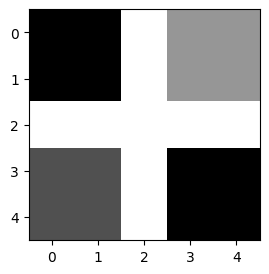

In [3]:
plt.figure(figsize=(3, 3))
plt.imshow(numpy_img_1ch, cmap='gray')
plt.show()

#### Versi RGB

In [4]:
# Create an RGB version of the numpy_img_1ch with a yellow plus sign and green background
numpy_img_rgb = np.zeros((5, 5, 3), dtype=np.uint8)

# Set the background to green
numpy_img_rgb[:, :] = [0, 255, 0]

# Set the plus sign to yellow
numpy_img_rgb[2, :] = [255, 255, 0]
numpy_img_rgb[:, 2] = [255, 255, 0]

print(f"Channel Merah: \n{numpy_img_rgb[:, :, 0]}")
print(f"Channel Hijau: \n{numpy_img_rgb[:, :, 1]}")
print(f"Channel Biru: \n{numpy_img_rgb[:, :, 2]}")

Channel Merah: 
[[  0   0 255   0   0]
 [  0   0 255   0   0]
 [255 255 255 255 255]
 [  0   0 255   0   0]
 [  0   0 255   0   0]]
Channel Hijau: 
[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]
Channel Biru: 
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


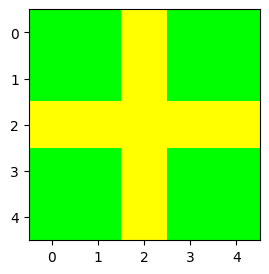

In [5]:
plt.figure(figsize=(3, 3))
plt.imshow(numpy_img_rgb)
plt.show()

**Experimen Mandiri:**
- Coba ubah agar kotak kecil di kanan atas menjadi warna biru

Kesimpulan: Gambar adalah matriks nilai piksel. Setiap piksel mewakili warna, dan intensitas warna tersebut ditentukan oleh nilainya.

---
## Membaca Gambar

In [6]:
path_gambar1 = os.path.join(os.getcwd(), 'data', 'sample-a-img-if4021.jpg')
path_gambar2 = os.path.join(os.getcwd(), 'data', 'sample-b-img-if4021.jpg')

# mengecek apakah file gambar ada
# jika tidak ada, akan tercetak pesan "File tidak ditemukan: <path>"
if not os.path.exists(path_gambar1):
    print('File tidak ditemukan:', path_gambar1)
    exit()

## Cara Meloading Gambar Menggunakan `cv2.imread`

Untuk meloading gambar menggunakan `cv2.imread`, ikuti langkah-langkah berikut:

1. **Import Library yang Diperlukan**: Pastikan Anda telah mengimport library `cv2` dan `os`.

2. **Tentukan Path Gambar**: Tentukan path gambar yang ingin Anda load. Anda bisa menggunakan fungsi `os.path.join` untuk membuat path yang sesuai dengan sistem operasi Anda.

3. **Load Gambar**: Gunakan fungsi `cv2.imread` untuk meload gambar. Fungsi ini akan mengembalikan gambar dalam bentuk array numpy.

4. **Tampilkan Gambar**: Anda bisa menggunakan `cv2.imshow` untuk menampilkan gambar yang telah diload.

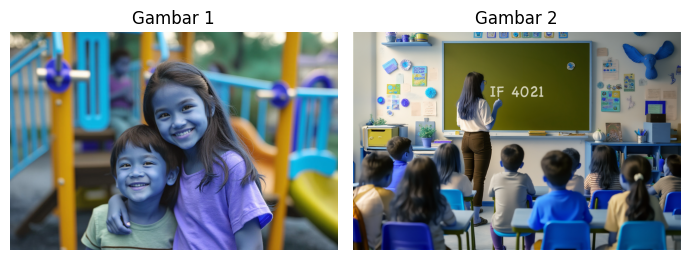

In [7]:
img1 = cv2.imread(path_gambar1)
img2 = cv2.imread(path_gambar2)

ax, fig = plt.subplots(1, 2, figsize=(7, 4))
fig[0].imshow(img1)
fig[0].set_title('Gambar 1')
fig[0].axis('off')
fig[1].imshow(img2)
fig[1].set_title('Gambar 2')
fig[1].axis('off')
plt.tight_layout()
plt.show()

**Mengapa gambar dan kulit dari orang di gambar terlihat aneh?**
- Karena gambar tersebut berformat BGR (dan bukan RGB) sehingga kita perlu mengkonversikannya ke dalam format RGB

Caranya:
- `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

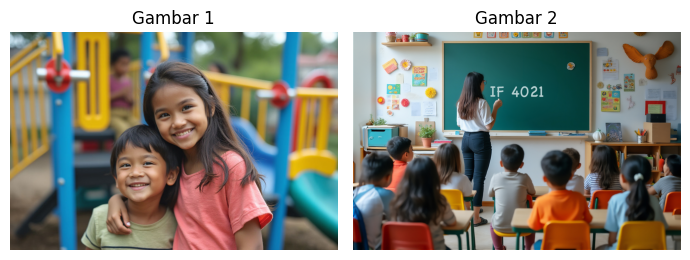

In [8]:
img1 = cv2.imread(path_gambar1) # masih dalam format BGR
img2 = cv2.imread(path_gambar2) # masih dalam format BGR

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # konversi ke format RGB
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # konversi ke format RGB

ax, fig = plt.subplots(1, 2, figsize=(7, 4))
fig[0].imshow(img1)
fig[0].set_title('Gambar 1')
fig[0].axis('off')
fig[1].imshow(img2)
fig[1].set_title('Gambar 2')
fig[1].axis('off')
plt.tight_layout()
plt.show()

## Bermain dengan Pixel Value

Gambar tersebut tersusun atas nilai-nilai RGB sepanjang baris dan kolom. Nilai RGB tersebut memiliki rentang 0-255.

**Mengapa 0-255?**
- Karena kita bekerja dengan gambar 8-bit. Artinya, setiap channel memiliki 8-bit, sehingga rentang nilai yang mungkin adalah 0-255.
- 8 bit berarti warna hitam adalah `00000000` dan warna putih adalah `11111111` atau 0-255 dalam desimal.

Mari melihat isi dari pixel value tersebut. Pertama-tama kita mau mengecek `shape` dari gambar tersebut. `shape` adalah atribut dari numpy array yang menunjukkan dimensi dari array tersebut.

In [9]:
print(f"Mengecek ukuran dimensi gambar: {img1.shape}")

Mengecek ukuran dimensi gambar: (768, 1152, 3)


Urutan `shape` adalah `(baris, kolom, channel)`. Mari coba kita lihat isi dari pixel value tersebut untuk masing-masing channel R, G, dan B pada 5 baris pertama dan 5 kolom pertama.

In [10]:
row5_column5_img1 = img1[0:5, 0:5]
print(f"Isi dari row5_column5_img1:\n{row5_column5_img1}")

Isi dari row5_column5_img1:
[[[131 139 142]
  [118 133 138]
  [104 132 135]
  [ 95 130 134]
  [ 88 126 129]]

 [[124 134 136]
  [111 129 133]
  [102 130 133]
  [ 95 130 134]
  [ 88 126 129]]

 [[116 132 132]
  [108 128 129]
  [102 130 133]
  [ 97 131 133]
  [ 91 126 128]]

 [[116 136 135]
  [107 131 131]
  [103 133 135]
  [101 132 135]
  [ 94 128 130]]

 [[116 143 138]
  [107 136 132]
  [103 133 133]
  [100 131 133]
  [ 93 124 126]]]


Supaya anda semakin jelas, kita akan mengubah seluruh nilai pixel tersebut (100 row pertama, dan 100 column pertama) menjadi 0 pada channel G dan B serta 255 pada channel R. Dengan demikian, gambar tersebut akan menjadi merah.

Dimensi gambar: (768, 1152, 3)


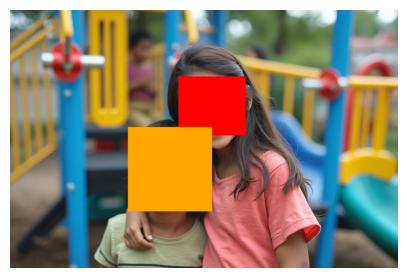

In [20]:
img1 = cv2.imread(path_gambar1) # masih dalam format BGR
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # konversi ke format RGB

merah = [255, 0, 0]
orange = [255, 165, 0]

print(f"Dimensi gambar: {img1.shape}")


x, y , w, h = 500, 200, 200, 175
img1[y:y+h, x:x+w] = merah

x1, y1, x2, y2 = 350, 350, 600, 600
img1[y1:y2, x1:x2] = orange

plt.figure(figsize=(5, 5))
plt.imshow(img1)
plt.axis('off')
plt.show()

**Pertanyaan Analisa:**
- Dapatkah anda membuat kotak warna biru di bagian tengah dari gambar 2?
    - Anda dapat menghitung dimensi dari gambar tersebut dengan cara `img.shape`, lalu menghitung nilai tengahnya untuk membantu anda membuat kotak tersebut.

> Pertanyaan analisa adalah pertanyaan yang tidak dinilai. Namun jika anda memang ingin sungguh-sungguh belajar, sangat disarankan untuk mencoba menjawabnya. "Challange yourself!"

## Konversi Menjadi Grayscale

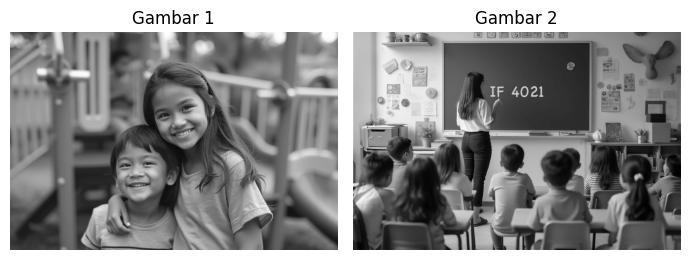

In [12]:
# memuat ulang gambar 1 dan gambar 2
img1 = cv2.imread(path_gambar1) # ingat, gambar yang dimuat masih dalam format BGR
img2 = cv2.imread(path_gambar2)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) # konversi ke format Grayscale
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) # konversi ke format Grayscale

ax, fig = plt.subplots(1, 2, figsize=(7, 4))
fig[0].imshow(img1, cmap='gray')
fig[0].set_title('Gambar 1')
fig[0].axis('off')
fig[1].imshow(img2, cmap='gray')
fig[1].set_title('Gambar 2')
fig[1].axis('off')
plt.tight_layout()
plt.show()

## Menampilkan Histogram

Histogram adalah grafik yang menunjukkan distribusi intensitas warna pada gambar. Histogram sangat berguna untuk mengetahui distribusi warna pada gambar. Kita akan menggunakan `cv2.calcHist` untuk menghitung histogram dari gambar tersebut.

**Jangan lupa, image yang kita load belum diubah ke RGB**

In [13]:
img1 = cv2.imread(path_gambar1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [14]:
histo_red = cv2.calcHist([img1], [0], None, [256], [0, 256])
histo_green = cv2.calcHist([img1], [1], None, [256], [0, 256])
histo_blue = cv2.calcHist([img1], [2], None, [256], [0, 256])

Penjelasan **cv2.calcHist**:

```python
cv2.calcHist(images, channels, mask, histSize, ranges)
```

dimana:
- `images` adalah gambar yang akan dihitung histogramnya
- `channels` adalah channel yang akan dihitung histogramnya
- `mask` adalah mask yang akan digunakan. Jika `None`, maka akan menghitung seluruh gambar
- `histSize` adalah jumlah bin yang akan digunakan. Maksudnya adalah, histogram akan dibagi menjadi beberapa bagian sesuai dengan jumlah bin tersebut.
- `ranges` adalah range nilai yang akan digunakan. Biasanya adalah `(0, 256)` untuk gambar 8-bit.

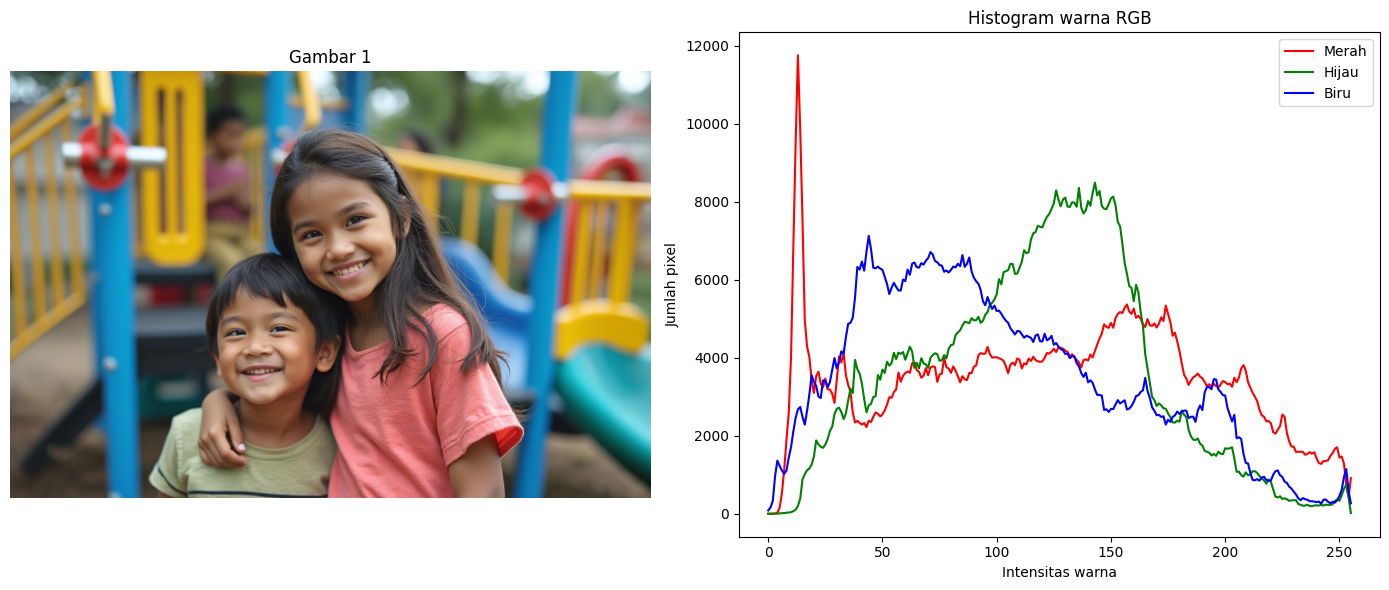

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the actual image
ax[0].imshow(img1)
ax[0].set_title('Gambar 1')
ax[0].axis('off')

# Plot the histogram
ax[1].plot(histo_red, color='red')
ax[1].plot(histo_green, color='green')
ax[1].plot(histo_blue, color='blue')
ax[1].set_title('Histogram warna RGB')
ax[1].set_xlabel('Intensitas warna')
ax[1].set_ylabel('Jumlah pixel')
ax[1].legend(['Merah', 'Hijau', 'Biru'])

plt.tight_layout()
plt.show()

**Cara Membaca / Menginterpretasi Histogram**
1. Histogram yang tinggi menunjukkan banyaknya piksel pada nilai tersebut.
2. Dalam kasus diatas, channel merah dengan intensitas warna rendah (0-50) memiliki piksel yang lebih banyak dibandingkan dengan channel biru dan hijau. Artinya:
    - Warna merah yang tampil di gambar cenderung lebih gelap.
3. Dalam istilah fotografi, intensitas warna ini dapat dikategorikan sebagai:
    - Black: Intensitas 0 - 50
    - Shadows: Intensitas 50 - 100
    - Midtones: Intensitas 100 - 150
    - Highlights: Intensitas 150 - 200
    - White: Intensitas 200 - 255

**Mari kita coba untuk menaikkan intensitas warna hanya pada channel merah.**

In [16]:
img1_edit = img1.copy() # kita buat salinan dari img1 agar tidak merubah img1 asli
img1_edit[:,:,0] = img1[:,:,0] * 1.2 # Menaikkan semua nilai pixel pada channel merah sebesar 20%

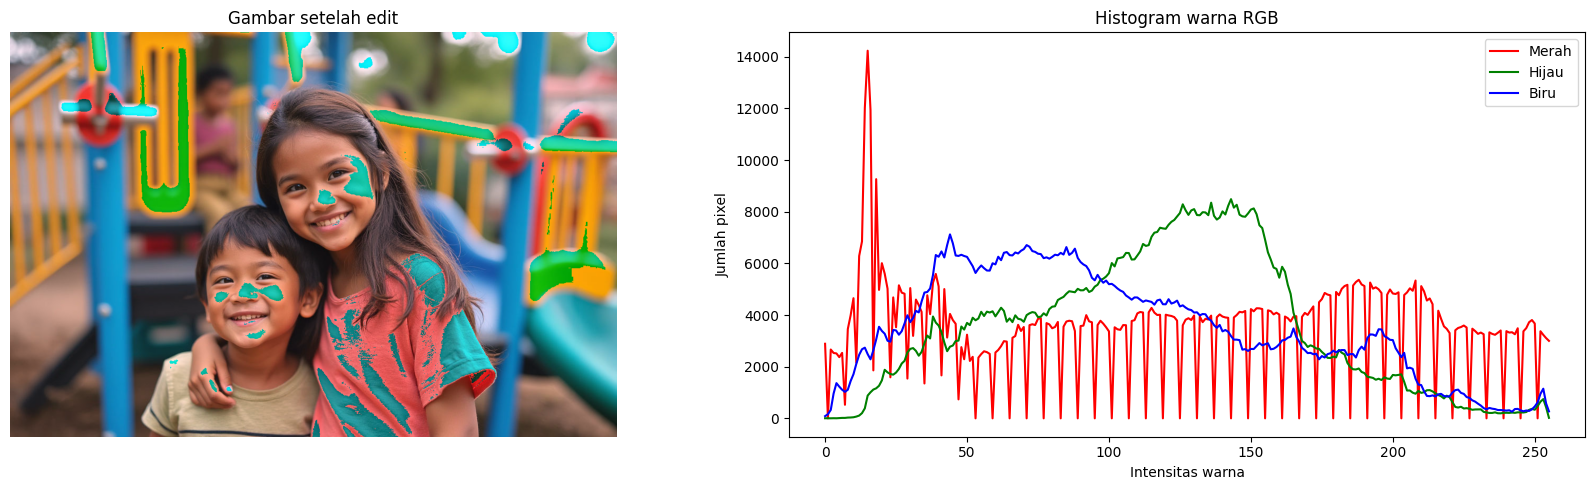

In [17]:
histo_img1_red_edit = cv2.calcHist([img1_edit], [0], None, [256], [0, 256])
histo_img1_green_edit = cv2.calcHist([img1_edit], [1], None, [256], [0, 256])
histo_img1_blue_edit = cv2.calcHist([img1_edit], [2], None, [256], [0, 256])

ax, fig = plt.subplots(1, 2, figsize=(17, 5))
fig[0].imshow(img1_edit)
fig[0].axis('off')
fig[0].set_title('Gambar setelah edit')
fig[1].plot(histo_img1_red_edit, color='red')
fig[1].plot(histo_img1_green_edit, color='green')
fig[1].plot(histo_img1_blue_edit, color='blue')
fig[1].set_title('Histogram warna RGB')
fig[1].set_xlabel('Intensitas warna')
fig[1].set_ylabel('Jumlah pixel')
fig[1].legend(['Merah', 'Hijau', 'Biru'])
plt.tight_layout()
plt.show()

Gambar akan rusak apabila kita mengalikannya secara langsung. Sangat disrankan menggunakan operasi seperti `cv2.add` untuk menambah atau `cv2.multiply` untuk mengalikan.

---

## Menaikkan Intensitas Warna Merah Tanpa Merusak Gambar

- Kita akan menaikkan intensitas warna hanya pada channel merah yang berintensitas kurang dari 100

In [18]:
img1_edit = img1.copy() # kita buat salinan dari img1 agar tidak merubah img1 asli

for row in range(img1_edit.shape[0]):
    for col in range(img1_edit.shape[1]):
        
        if img1_edit[row, col, 0] < 100:
            img1_edit[row, col, 0] = img1_edit[row, col, 0] + 30

Mari kita cek hasilnya

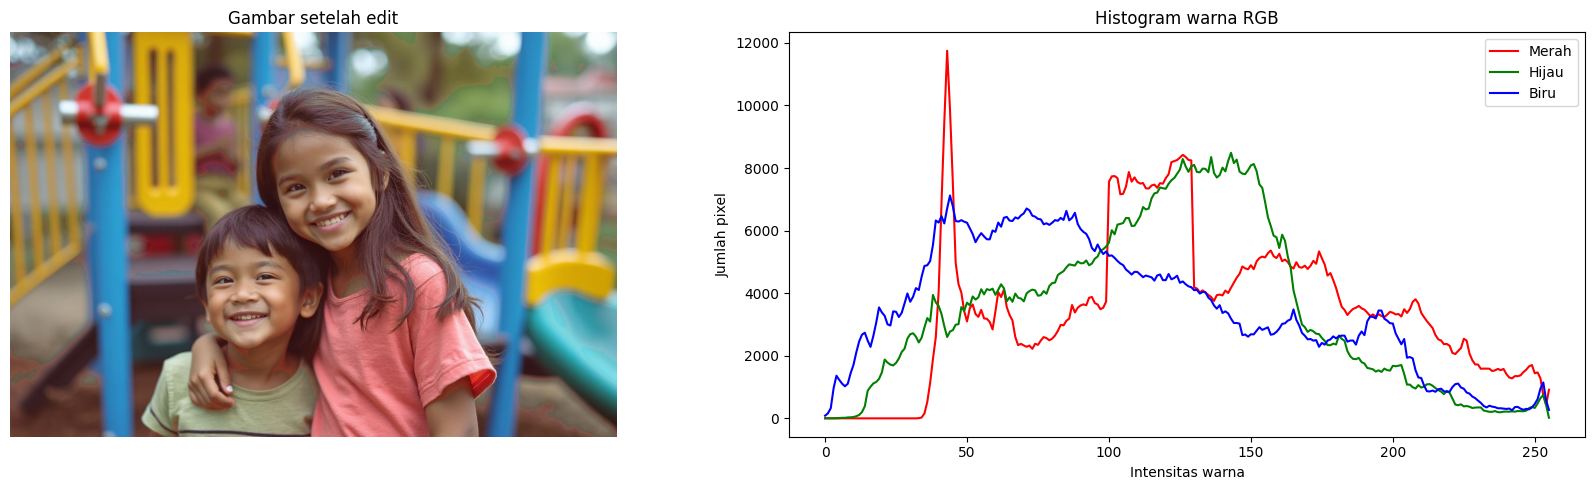

In [19]:
histo_img1_red_edit = cv2.calcHist([img1_edit], [0], None, [256], [0, 256])
histo_img1_green_edit = cv2.calcHist([img1_edit], [1], None, [256], [0, 256])
histo_img1_blue_edit = cv2.calcHist([img1_edit], [2], None, [256], [0, 256])

ax, fig = plt.subplots(1, 2, figsize=(17, 5))
fig[0].imshow(img1_edit)
fig[0].axis('off')
fig[0].set_title('Gambar setelah edit')
fig[1].plot(histo_img1_red_edit, color='red')
fig[1].plot(histo_img1_green_edit, color='green')
fig[1].plot(histo_img1_blue_edit, color='blue')
fig[1].set_title('Histogram warna RGB')
fig[1].set_xlabel('Intensitas warna')
fig[1].set_ylabel('Jumlah pixel')
fig[1].legend(['Merah', 'Hijau', 'Biru'])
plt.tight_layout()
plt.show()

---

## Tugas: `ho2`

1. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini. Editlah sebuah foto yang terdapat wajah anda, namun kali ini tidak dengan photoshop, melainkan dengan python. Lakukan penyesuaian berikut ini.
    - Lakukan resize untuk foto anda menjadi `1080` pada dimension terpanjangnya. Gunakan `cv2.resize` untuk melakukan resize.
    - Buatlah frame berwarna kuning (RGB value: 255, 255, 0) sebesar 25 pixel + dua digit terakhir NIM anda pada setiap sisi foto anda. Frame tersebut akan mengelilingi foto setebal 25 pixel + dua digit terakhir NIM anda.
    - Aturlah intensitas warna pada channel merah di bagian tengah (50 - 150), dan naikkan sebesar 20 poin
    - Turunkanlah intensitas warna pada channel biru di atas (200- 250), dan turunkan sebesar 20 poin
    - Tampilkanlah histogram dari foto tersebut
    - Jelaskan hasil eksperimen anda

2. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini
    - Convert image dari RGB menjadi Grayscale
    - Tampilkan histogram dari foto tersebut
    - Lakukanlah normalisasi level intensitas warna pada foto tersebut. Aturlah agar intensitas warna terendah menjadi 0, dan intensitas warna tertinggi menjadi 255
    - Tampilkan histogram dari hasil normalisasi
    - Buatlah pixel-art dari foto tersebut. Caranya adalah dengan mengubah intensitas warna menjadi 0 atau 255. Jika intensitas warna < 128, maka ubah menjadi 0, dan jika intensitas warna >= 128, maka ubah menjadi 255. Tunjukkan hasilnya

3. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini
    - Naikkan kecerahan (brightnes) pada foto tersebut. Anda tidak boleh menggunakan library `cv2` untuk menaikkan kecerahan. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
    - Turunkan saturasi warna pada foto tersebut. Anda tidak boleh menggunakan library `cv2` untuk menurunkan saturasi warna. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
    - Turunkan kontras pada foto tersebut. Anda tidak boleh menggunakan library `cv2` untuk menurunkan kontras. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut

### Ketentuan Penamaan File
```
nim_ho2.ipynb
```

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho2>.ipynb
```

- *Pastikan repo anda bersifat privat dan anda telah mengundang dosen pengampu ke repositori anda*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan

